Text(0, 0.5, 'Head Length')

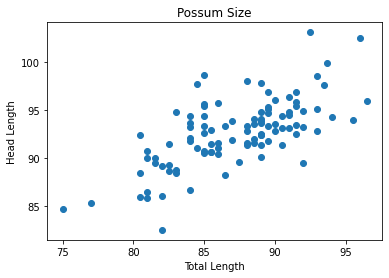

In [100]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
 
 
possum_data = pd.read_csv("2.4.2 Possum Data.csv")

#drop empty rows in age column to match arff file provided
cleaned_possum_data = possum_data.dropna(subset = ["age"]) 

X = cleaned_possum_data["totlngth"].values.reshape(-1,1)
y = cleaned_possum_data["hdlngth"] #target

plt.scatter(X,y)
plt.title("Possum Size")
plt.xlabel("Total Length")
plt.ylabel("Head Length")

In [112]:
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
#coeff?
coef = cross_val_score(model, X, y, scoring="r2", cv=cv, n_jobs=-1)
#mae
mae = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
#rmse
rsme = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("coefficient?")
print(np.mean(coef))
print("mean absolute error")
print(np.mean(np.absolute(mae)))
print("root mean squared error")
print(np.sqrt(np.mean(np.absolute(rsme))))

print("total number of instances")
print(len(X))

coefficient?
0.29780167277757974
mean absolute error
2.034931301217301
root mean squared error
2.6370033666418045
total number of instances
102
